<a href="https://colab.research.google.com/github/botakab/Stroke-Prediction/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stroke**

1. **Task:** To find out, whether the patient
survived the stroke or did not.
2. **Data:** Anonymized data from the UMC at NU.
3. **Number of intances:** 150 subjects
4. **Number of attributes:** 599 intances(1 dependent)

# 1. **Data preprocessing**

1.1 **Reading the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/baktybekdoskul/Stroke/master/baseline.csv')
df.head()

1.2 **Dropping unnecessary columns** From common sense we know that column like *Patient number*, *patient initials* shouldn't affect to the result 

In [ ]:
df.drop(columns=['Patient Number', 'Patient Initials'], axis=1, inplace=True)
df.head()

,Age,Gender,Primary Diagnosis,Comorbidities (Diagnosis),Weight,Height,Date of Admission to Hospital,Date of Discharge from Hospital,Days in Hospital,Date of admission to ICU,Date of discharge from ICU,Days in ICU,Death (yes/no),DEATH,Date of Death,History of Hypertension (yes/no),History of Hypertension,History of IHD (yes/no),History of IHD,History of Diabetes Mellitus (yes/no),History of Diabetes Mellitus,History of A-Fibrillation (yes/no),History of A-Fibrillation,History of Metabolic Syndrome (yes/no),History of Metabolic Syndrome,History of Chronic Renal Failure (yes/no),History of Chronic Renal Failure,History of Chronic Liver Failure (yes/no),History of Chronic Liver Failure,History of CVD,GCS on admission to hospital,Sys BP on admission to hospital,Dias BP on admission to hospital,Heart Rate on admission to hospital,Hemiparesis on admission to hospital (yes/no/unconscious),Stroke diagnosis (Ischemic/hemorrhagic) on admission,Stroke_diag_ischemic,Stroke_diag_hemorrhagic,Stroke_diag_mixed,Stroke_diag_TIA,...,antibiotics_antimycotics_amoxicillin,antibiotics_antimycotics_ampicillin,antibiotics_antimycotics_avelox,antibiotics_antimycotics_cebanex,antibiotics_antimycotics_cef_iv,antibiotics_antimycotics_cefazolin,antibiotics_antimycotics_cefepime,antibiotics_antimycotics_cefoperazonum,antibiotics_antimycotics_cefpraz,antibiotics_antimycotics_ceftazidimum,antibiotics_antimycotics_ceftriaxone,antibiotics_antimycotics_cefuroximum,antibiotics_antimycotics_ciprofloxacinum,antibiotics_antimycotics_clavulanic_acid,antibiotics_antimycotics_fluconazole,antibiotics_antimycotics_fortum,antibiotics_antimycotics_gentamycinum,antibiotics_antimycotics_invanz,antibiotics_antimycotics_megacef,antibiotics_antimycotics_metronidazolum,antibiotics_antimycotics_mycomax,antibiotics_antimycotics_mycosan,antibiotics_antimycotics_ofloxacinum,antibiotics_antimycotics_prepenem,antibiotics_antimycotics_timentin,antibiotics_antimycotics_trifamox,antibiotics_antimycotics_present,Glucocorticosteroids in ICU (yes/no),glucocorticosteroids_dexamethasone,glucocorticosteroids_prednisolonum,glucocorticosteroids_present,Vasopressors in ICU (yes/no),vasopressors_dobutaminum,vasopressors_dopamine,vasopressors_epinephrine,vasopressors_epinephrinum,vasopressors_mesaton,vasopressors_norepinephrinum,vasopressors_phenylephrine,vasopressors_present
0,87,f,Ischemic stroke. Cerebral infarction. Right MC...,Arterial hypertension. Risk 4.,NaN,NaN,11/18/2009,11/24/2009,6.0,11/18/2009,11/22/2009,4.0,no,0,no,yes,1,yes,1,no,0,yes,1,no,0.0,no,0,no,0,Arterial hypertension. Risk 4. Coronary heart ...,11,190,100,140,yes,Ischemic,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,no,0,0,0,NaN,0,0,0,0,0,0,0,0
1,72,f,Ischemic stroke. Cerebral infarction. Left MCA...,Arterial hypertension. Risk 4. Diabetes mellit...,NaN,NaN,11/25/2009,12/4/2009,9.0,11/25/2009,11/25/2009,0.0,no,0,no,yes,1,no,0,yes,1,no,0,yes,1.0,yes,1,no,0,Arterial hypertension. Risk 4. Coronary heart ...,15,210,110,88,yes,Ischemic,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,0,0,0,NaN,0,0,0,0,0,0,0,0
2,55,m,Intracerebral hemorrhage. Repeated hemorrhagic...,Hypostatic pneumonia. Respiratory failure 2.Ar...,NaN,NaN,11/11/2009,11/21/2009,10.0,11/11/2009,11/19/2009,8.0,no,0,no,yes,1,no,0,no,0,no,0,no,0.0,no,0,no,0,no,13,170,100,80,yes,hemorrhagic,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,no,0,0,0,NaN,0,0,0,0,0,0,0,0
3,76,f,Ischemic stroke. Cerebral infarction. Left ACA.,Arterial hypertension. Risk 4. Diabetes mellit...,NaN,NaN,11/18/2009,11/25/2009,7.0,11/18/2009,11/21/2009,3.0,no,0,no,yes,1,yes,1,yes,1,yes,1,yes,1.0,no,0,no,0,Arterial hypertension. Risk 4. Coronary heart ...,12,180,100,80,no,Ischemic,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Yes. Dexamethasone.,1,0,1,NaN,0,0,0,0,0,0,0,0
4,72,f,Intracerebral hemorrhage. Hemorrhagic stroke. ...,Arterial hypertension. Risk 4.,NaN,NaN,11/17/2009,12/4/2009,17.0,11/17/2009,11/25/2009,8.0,no,0,

1.3 **Initial data selection** Selected only numberic columns that we transformed or can be used directly (further we will obtain crucial columns)

In [ ]:
data = df.select_dtypes(include=np.int64)
data.columns

Index(['Age', 'DEATH', 'History of Hypertension', 'History of IHD',
       'History of Diabetes Mellitus', 'History of A-Fibrillation',
       'History of Chronic Renal Failure', 'History of Chronic Liver Failure',
       'GCS on admission to hospital', 'Heart Rate on admission to hospital',
       ...
       'glucocorticosteroids_prednisolonum', 'glucocorticosteroids_present',
       'vasopressors_dobutaminum', 'vasopressors_dopamine',
       'vasopressors_epinephrine', 'vasopressors_epinephrinum',
       'vasopressors_mesaton', 'vasopressors_norepinephrinum',
       'vasopressors_phenylephrine', 'vasopressors_present'],
      dtype='object', length=154)

1.4 **Splitting out feature and target**

In [ ]:
X = data.drop(columns=['DEATH'])
y = data['DEATH']

1.5 **Data normalization**

In [ ]:
x = X.values


#2. **Data Visualization** 
(Only dependent vars are visualized. Because, we have to much indepent variables and visualization of the each variable will be unreadable and very cumbersome. Also, data correlation matrix for indepent features will be impossible to read it thus we did not include it)

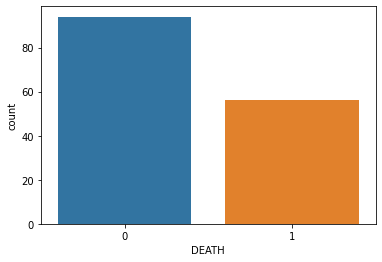

In [ ]:
ax = sns.countplot(y)

In [ ]:
y.count()

150

# 3. **Data split**

In [ ]:
from sklearn.model_selection import train_test_split, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

# 4. **Applying models**

4.1 **Logistic Regression classifier with cross validation**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=5000, random_state=12, cv=kfold)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None,
                     cv=KFold(n_splits=10, random_state=12, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=5000, multi_class='auto',
                     n_jobs=None, penalty='l1', random_state=12, refit=True,
                     scoring=None, solver='liblinear', tol=0.0001, verbose=0)

In [ ]:
clf.score(X_test, y_test)

0.72

In [ ]:
clf.coef_

array([[-0.01536676,  0.        ,  0.26378955,  0.        ,  0.        ,
         0.        ,  0.        , -0.0913191 ,  0.00405711,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.52989167,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.06590874,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

4.2 As you can see l1 regularization forced many coefficents to become 0. Thus, we can **focus** on only on **features with non-zero coefficents**


In [ ]:
for column, coef in zip(X.columns, clf.coef_[0]):
    if coef != 0:
        print(f'{column}: {coef}')

Age: -0.015366764276459244
History of IHD: 0.26378954793212545
GCS on admission to hospital: -0.09131909664330086
Heart Rate on admission to hospital: 0.004057109871173515
antihypertensive_yes-non-regularle: 0.5298916719055814
antihypertensive_icu_magnesium_sulfate: -0.06590873695396048
antihypertensive_icu_enap: 0.1259166929368269
antibiotics_antimycotics_cefazolin: 0.15814479577580623
vasopressors_dopamine: 1.8426725399079784


**Questions that should be adressed further:**

1.   What columns are crucial from the medicinal sense?(We need to eliminate unnecessary columns in order to make our data more comprehensible and easy to manage)
2.   How to interpret the values of Hyperglecemia column?
3.   Baseline info: stroke area column: is rmca==rmch? , lpca==lmca??
4.   How important are specific comorbidities that are peculiar (owned by) a small group of people? If some comorbidity is not listed for a particular patient, does this mean he doesn’t own this disease or whatever?
5. Can we use average of blood pressures instead of using each day blood pressure?

